In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
import statsmodels.api as sm

# Data Description

In [2]:
# Load datasets
rate_df = pd.read_csv('new_rate.csv')

In [3]:
# Display basic information
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 24 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   BusinessYear                               int64  
 1   StateCode                                  object 
 2   IssuerId                                   int64  
 3   SourceName                                 object 
 4   VersionNum                                 int64  
 5   ImportDate                                 object 
 6   IssuerId2                                  int64  
 7   FederalTIN                                 object 
 8   RateEffectiveDate                          object 
 9   RateExpirationDate                         object 
 10  PlanId                                     object 
 11  RatingAreaId                               object 
 12  Tobacco                                    object 
 13  Age                                       

In [4]:
rate_df.shape

(4000000, 24)

In [5]:
# Display summary statistics
rate_df.describe()

,BusinessYear,IssuerId,VersionNum,IssuerId2,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,1.676516e+06,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,4.000000e+06
mean,2.014051e+03,5.123122e+04,6.898281e+00,5.123122e+04,1.228232e+04,5.559161e+02,48.390737,48.859113,68.480813,91.983590,71.268838,90.262413,113.752768,6.379202e+03
std,2.197997e-01,2.587109e+04,2.625908e+00,2.587109e+04,1.086139e+05,3.316287e+02,21.241677,19.677290,31.599817,47.594181,33.152732,44.462598,60.344878,9.342592e+03
min,2.014000e+03,1.019100e+04,1.000000e+00,1.019100e+04,0.000000e+00,5.566000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+01
25%,2.014000e+03,3.011500e+04,5.000000e+00,3.011500e+04,3.224000e+01,3.384600e+02,31.390000,33.220000,43.580000,50.430000,47.757500,60.640000,66.940000,8.800000e+02
50%,2.014000e+03,4.919300e+04,7.000000e+00,4.919300e+04,2.965300e+02,4.724500e+02,46.400000,47.880000,69.700000,95.910000,71.735000,93.835000,119.255000,2.767000e+03
75%,2.014000e+03,7.216600e+04,9.000000e+00,7.216600e+04,4.807321e+02,6.908500e+02,61.160000,61.287500,89.005000,122.610000,92.410000,118.700000,151.912500,7.317000e+03
max,2.015000e+03,9.996900e+04,1.600000e+01,9.996900e+04,9.999990e+05,6.604610e+03,182.400000,169.650000,251.740000,357.940000,260.850000,339.310000,449.140000,6.349300e+04


In [6]:
# Check for missing values
missing_values = rate_df.isnull().sum()
missing_values

BusinessYear                                       0
StateCode                                          0
IssuerId                                           0
SourceName                                         0
VersionNum                                         0
ImportDate                                         0
IssuerId2                                          0
FederalTIN                                         0
RateEffectiveDate                                  0
RateExpirationDate                                 0
PlanId                                             0
RatingAreaId                                       0
Tobacco                                            0
Age                                                0
IndividualRate                                     0
IndividualTobaccoRate                        2323484
Couple                                       3989964
PrimarySubscriberAndOneDependent             3989964
PrimarySubscriberAndTwoDependents            3

In [7]:
# Count total number of rows
total_rows = rate_df.shape[0]
print(f"Total number of rows: {total_rows}")

Total number of rows: 4000000


In [8]:
rate_df = rate_df.sample(n=200000, random_state=42)

In [9]:
rate_df.shape

(200000, 24)

In [10]:
# Calculate the percentage of missing values in each column
missing_percentage = rate_df.isnull().mean() * 100
missing_percentage

BusinessYear                                  0.0000
StateCode                                     0.0000
IssuerId                                      0.0000
SourceName                                    0.0000
VersionNum                                    0.0000
ImportDate                                    0.0000
IssuerId2                                     0.0000
FederalTIN                                    0.0000
RateEffectiveDate                             0.0000
RateExpirationDate                            0.0000
PlanId                                        0.0000
RatingAreaId                                  0.0000
Tobacco                                       0.0000
Age                                           0.0000
IndividualRate                                0.0000
IndividualTobaccoRate                        58.0625
Couple                                       99.7445
PrimarySubscriberAndOneDependent             99.7445
PrimarySubscriberAndTwoDependents            9

# Data Cleaning 

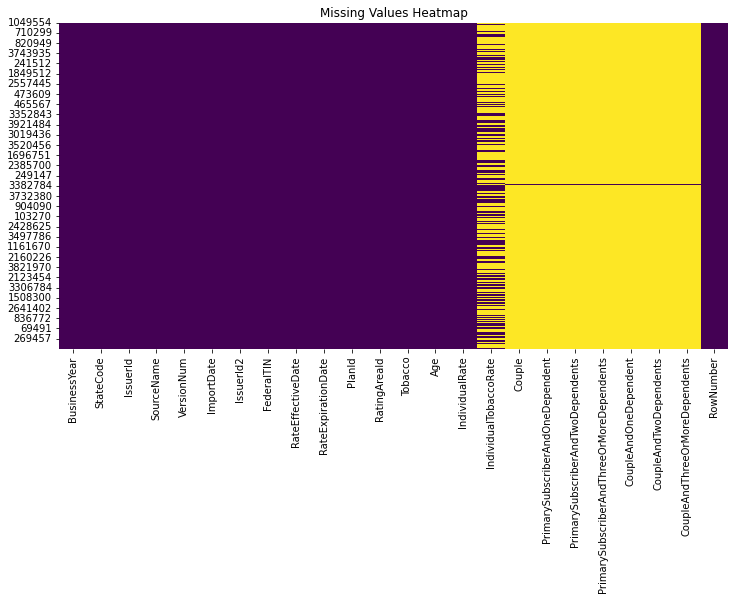

In [11]:
# Plot missing values
plt.figure(figsize=(12, 6))
sns.heatmap(rate_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [12]:
# Drop columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 70].index
rate_df.drop(columns=columns_to_drop, inplace=True)

In [13]:
# List of columns to drop
columns_to_drop = [
    'ImportDate',
    'FederalTIN'
]

In [14]:
# Drop the specified columns
rate_df.drop(columns=columns_to_drop, inplace=True)

In [15]:
# Calculate the percentage of missing values in each column
missing_percentage = rate_df.isnull().mean() * 100
missing_percentage

BusinessYear              0.0000
StateCode                 0.0000
IssuerId                  0.0000
SourceName                0.0000
VersionNum                0.0000
IssuerId2                 0.0000
RateEffectiveDate         0.0000
RateExpirationDate        0.0000
PlanId                    0.0000
RatingAreaId              0.0000
Tobacco                   0.0000
Age                       0.0000
IndividualRate            0.0000
IndividualTobaccoRate    58.0625
RowNumber                 0.0000
dtype: float64

# Data Preprocessing 

# Bussiness Year Handling

In [16]:
# Replace BusinessYear values
rate_df['BusinessYear'] = rate_df['BusinessYear'].replace({2014: 2021, 2015: 2022, 2016: 2023})

# Age Data Handling

In [17]:
# 1. Remove rows where Age is "Family Option"
rate_df = rate_df[rate_df['Age'] != 'Family Option']

In [18]:
# Replace '0-20' with 18 in the Age column
rate_df['Age'] = rate_df['Age'].replace('0-20', 18)

In [19]:
# Replace '65 and over' with a distributed value from 66 to 70
rate_df['Age'] = rate_df['Age'].apply(lambda x: np.random.choice([66, 67, 68, 69, 70]) if x == '65 and over' else x)
rate_df['Age'] = pd.to_numeric(rate_df['Age'], errors='coerce')

# Handling the IndividualTabaccoRate

In [20]:
# Fill missing values in the 'IndividualTobaccoRate' column with 0
rate_df['IndividualTobaccoRate'].fillna(0, inplace=True)

In [21]:
# Verify that missing values have been filled
print(rate_df['IndividualTobaccoRate'].isnull().sum())

0


In [22]:
# Calculate the percentage of missing values in each column
missing_percentage = rate_df.isnull().mean() * 100
missing_percentage

BusinessYear             0.0
StateCode                0.0
IssuerId                 0.0
SourceName               0.0
VersionNum               0.0
IssuerId2                0.0
RateEffectiveDate        0.0
RateExpirationDate       0.0
PlanId                   0.0
RatingAreaId             0.0
Tobacco                  0.0
Age                      0.0
IndividualRate           0.0
IndividualTobaccoRate    0.0
RowNumber                0.0
dtype: float64

# Handling RatingAreaID 

In [23]:
# Remove 'Rating Area ' prefix in RatingAreaId
rate_df['RatingAreaId'] = rate_df['RatingAreaId'].str.replace('Rating Area ', '', regex=False)
rate_df['RatingAreaId'] = pd.to_numeric(rate_df['RatingAreaId'], errors='coerce')

# Find the OutLiers in IndividualRate Adding Premium Column By Adding IR and ITR

In [24]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = rate_df['IndividualRate'].quantile(0.25)
Q3 = rate_df['IndividualRate'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = rate_df[(rate_df['IndividualRate'] < lower_bound) | (rate_df['IndividualRate'] > upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

Number of outliers detected: 4001
Lower bound for outliers: -638.395
Upper bound for outliers: 1150.525


In [25]:
# Remove outliers
rate_df = rate_df[(rate_df['IndividualRate'] >= lower_bound) & (rate_df['IndividualRate'] <= upper_bound)]

In [26]:
# Add 'IndividualRate' and 'IndividualTobaccoRate' to create 'Premium'
rate_df['Premium'] = rate_df['IndividualRate'] + rate_df['IndividualTobaccoRate']

In [27]:
# Drop the original 'IndividualRate' and 'IndividualTobaccoRate' columns
rate_df.drop(columns=['IndividualRate', 'IndividualTobaccoRate'], inplace=True)

# Date Data Handling For Import, RateEffective , RateExpiration

In [28]:
# Date Handling
rate_df['RateEffectiveDate'] = pd.to_datetime(rate_df['RateEffectiveDate'], format='%Y-%m-%d')
rate_df['RateExpirationDate'] = pd.to_datetime(rate_df['RateExpirationDate'], format='%Y-%m-%d')

In [29]:
# Update the year in the dates
def update_year(date):
    if date.year == 2013:
        return date.replace(year=2020)
    elif date.year == 2014:
        return date.replace(year=2021)
    elif date.year == 2015:
        return date.replace(year=2022)
    else:
        return date

In [30]:
rate_df['RateEffectiveDate'] = rate_df['RateEffectiveDate'].apply(update_year)
rate_df['RateExpirationDate'] = rate_df['RateExpirationDate'].apply(update_year)

In [31]:
# Remove rows where the date is None
rate_df = rate_df.dropna(subset=['RateEffectiveDate', 'RateExpirationDate'])

In [32]:
# Calculate RateDuration
rate_df['RateDuration'] = (rate_df['RateExpirationDate'] - rate_df['RateEffectiveDate']).dt.days

In [33]:
# Drop the original 'RateEffectiveDate' and 'RateExpirationDate' columns
rate_df.drop(columns=['RateEffectiveDate', 'RateExpirationDate'], inplace=True)

In [34]:
# Identify columns with only NaN values and drop them
columns_with_all_nan = rate_df.columns[rate_df.isna().all()]
rate_df.drop(columns=columns_with_all_nan, inplace=True)

In [35]:
# Find the NAN Values 

In [36]:
# Drop rows where 'Tobacco' column has NaN values
rate_df = rate_df.dropna(subset=['Tobacco'])

In [37]:
# Identify columns with only NaN values
columns_with_all_nan = rate_df.columns[rate_df.isna().all()]

# Display the columns
print(columns_with_all_nan)

Index([], dtype='object')


In [38]:
# Calculate the percentage of missing values in each column
missing_percentage = rate_df.isnull().mean() * 100
missing_percentage

BusinessYear    0.0
StateCode       0.0
IssuerId        0.0
SourceName      0.0
VersionNum      0.0
IssuerId2       0.0
PlanId          0.0
RatingAreaId    0.0
Tobacco         0.0
Age             0.0
RowNumber       0.0
Premium         0.0
RateDuration    0.0
dtype: float64

In [39]:
rate_df

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,IssuerId2,PlanId,RatingAreaId,Tobacco,Age,RowNumber,Premium,RateDuration
1049554,2021,IN,50816,HIOS,9,50816,50816IN0130034,11,Tobacco User/Non-Tobacco User,48,15636,1279.32,91
214510,2021,FL,16842,HIOS,6,16842,16842FL0070110,56,Tobacco User/Non-Tobacco User,32,10376,770.42,364
2145764,2021,ID,60597,SERFF,9,60597,60597ID0170006,3,Tobacco User/Non-Tobacco User,54,2670,1225.00,364
2198867,2021,WI,38166,HIOS,5,38166,38166WI0150007,16,No Preference,47,7033,506.95,90
1184366,2021,SC,26065,HIOS,4,26065,26065SC0380002,39,Tobacco User/Non-Tobacco User,38,3896,749.23,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901540,2021,PA,16481,HIOS,11,16481,16481PA0040002,8,Tobacco User/Non-Tobacco User,33,763,1176.36,90
3325231,2021,MI,34930,SERFF,1,34930,34930MI0100002,16,No Preference,18,1440,24.52,90
2857238,2021,TX,33602,HIOS,8,33602,33602TX0430003,11,No Preference,66,16067,767.43,89
11356,2021,FL,99787,HIOS,6,99787,99787FL0020002,50,No Preference,64,18366,33.15,364


# Handling Categorical Data

In [40]:
unique_state_codes = rate_df['StateCode'].unique()
print(f"Unique values in StateCode: {unique_state_codes}")
print(f"Number of unique StateCodes: {len(unique_state_codes)}")

Unique values in StateCode: ['IN' 'FL' 'ID' 'WI' 'SC' 'OK' 'TX' 'ME' 'IA' 'MI' 'PA' 'AZ' 'IL' 'OH'
 'LA' 'UT' 'GA' 'ND' 'NJ' 'AK' 'NE' 'NM' 'AL' 'VA' 'MT' 'NC' 'AR' 'MO'
 'SD' 'TN' 'DE' 'KS' 'MS' 'WY' 'WV' 'NH']
Number of unique StateCodes: 36


In [41]:
unique_tobacco = rate_df['Tobacco'].unique()
print(f"Unique values in Tobacco: {unique_tobacco}")
print(f"Number of unique Tobacco values: {len(unique_tobacco)}")

Unique values in Tobacco: ['Tobacco User/Non-Tobacco User' 'No Preference']
Number of unique Tobacco values: 2


In [42]:
unique_plan_ids = rate_df['PlanId'].unique()
print(f"Unique values in PlanId: {unique_plan_ids}")
print(f"Number of unique PlanIds: {len(unique_plan_ids)}")

Unique values in PlanId: ['50816IN0130034' '16842FL0070110' '60597ID0170006' ... '88925AZ0010003'
 '33709PA0400001' '70239AZ0010018']
Number of unique PlanIds: 6276


In [43]:
unique_source_names = rate_df['SourceName'].unique()
print(f"Unique values in SourceName: {unique_source_names}")
print(f"Number of unique SourceNames: {len(unique_source_names)}")

Unique values in SourceName: ['HIOS' 'SERFF' 'OPM']
Number of unique SourceNames: 3


In [44]:
print("Unique value counts for each column:")
print(f"StateCode: {rate_df['StateCode'].nunique()}")
print(f"Tobacco: {rate_df['Tobacco'].nunique()}")
print(f"PlanId: {rate_df['PlanId'].nunique()}")
print(f"SourceName: {rate_df['SourceName'].nunique()}")

Unique value counts for each column:
StateCode: 36
Tobacco: 2
PlanId: 6276
SourceName: 3


In [45]:
# Handling Categorical Data
label_encoder = LabelEncoder()

# Apply Label Encoding to the selected columns
rate_df['StateCode'] = label_encoder.fit_transform(rate_df['StateCode'])
rate_df['Tobacco'] = label_encoder.fit_transform(rate_df['Tobacco'])
rate_df['PlanId'] = label_encoder.fit_transform(rate_df['PlanId'])
rate_df['SourceName'] = label_encoder.fit_transform(rate_df['SourceName'])

In [46]:
# Scale numerical features
numerical_features = ['Age', 'Premium', 'RateDuration']
scaler = StandardScaler()
rate_df[numerical_features] = scaler.fit_transform(rate_df[numerical_features])

In [47]:
# Create an interaction term between 'Age' and 'RateDuration'
rate_df['Age_RateDuration_Interaction'] = rate_df['Age'] * rate_df['RateDuration']

In [48]:
# Final DataFrame check
rate_df.head()
rate_df.dtypes

BusinessYear                      int64
StateCode                         int32
IssuerId                          int64
SourceName                        int32
VersionNum                        int64
IssuerId2                         int64
PlanId                            int32
RatingAreaId                      int64
Tobacco                           int32
Age                             float64
RowNumber                         int64
Premium                         float64
RateDuration                    float64
Age_RateDuration_Interaction    float64
dtype: object

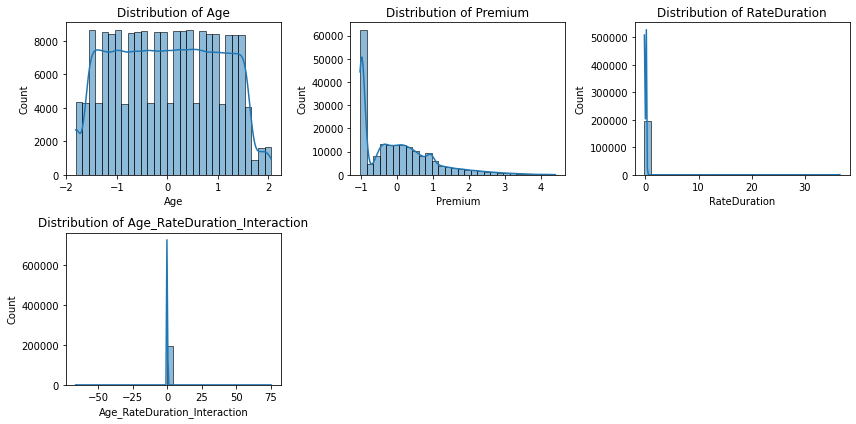

In [49]:
# EDA: Additional Plots

# 1. Histogram of Numerical Features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features + ['Age_RateDuration_Interaction']):
    plt.subplot(2, 3, i+1)
    sns.histplot(rate_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

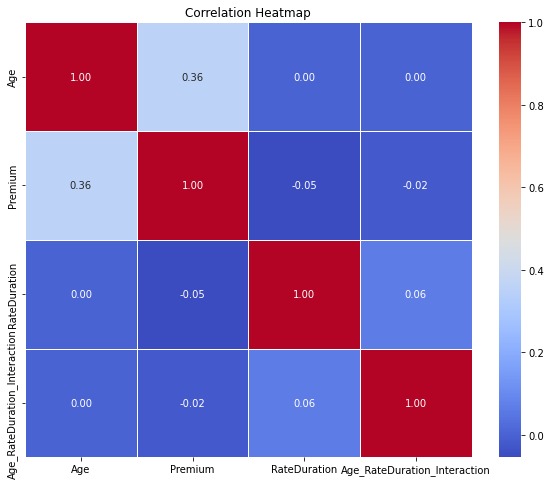

In [50]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = rate_df[numerical_features + ['Age_RateDuration_Interaction']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

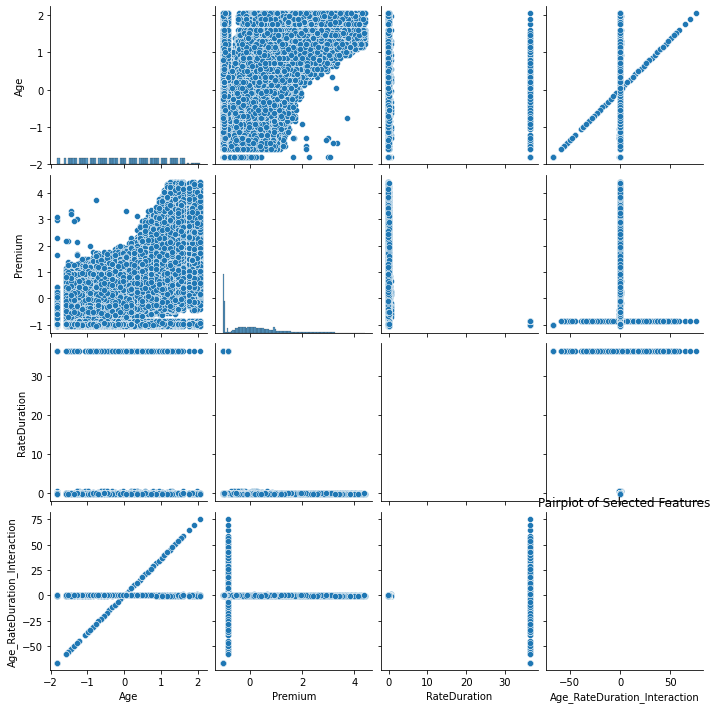

In [51]:
# 3. Pairplot of Selected Features
selected_features = ['Age', 'Premium', 'RateDuration', 'Age_RateDuration_Interaction']
sns.pairplot(rate_df[selected_features])
plt.title('Pairplot of Selected Features')
plt.show()

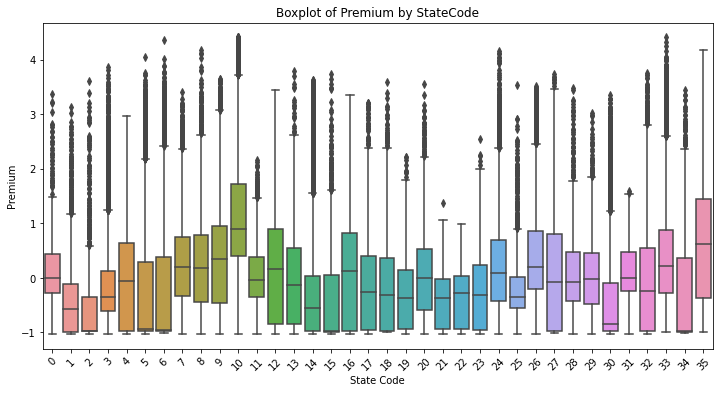

In [52]:
# 4. Boxplot of Premium by StateCode
plt.figure(figsize=(12, 6))
sns.boxplot(x='StateCode', y='Premium', data=rate_df)
plt.title('Boxplot of Premium by StateCode')
plt.xlabel('State Code')
plt.ylabel('Premium')
plt.xticks(rotation=45)
plt.show()

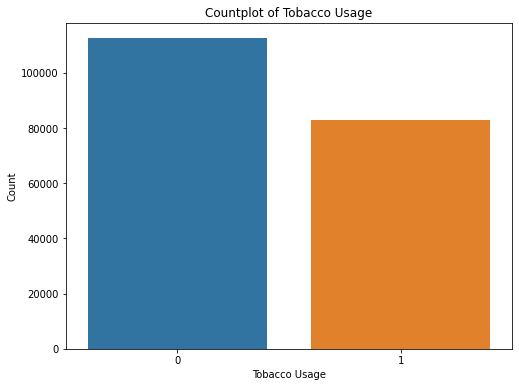

In [53]:
# 5. Countplot of Tobacco Usage
plt.figure(figsize=(8, 6))
sns.countplot(x='Tobacco', data=rate_df)
plt.title('Countplot of Tobacco Usage')
plt.xlabel('Tobacco Usage')
plt.ylabel('Count')
plt.show()

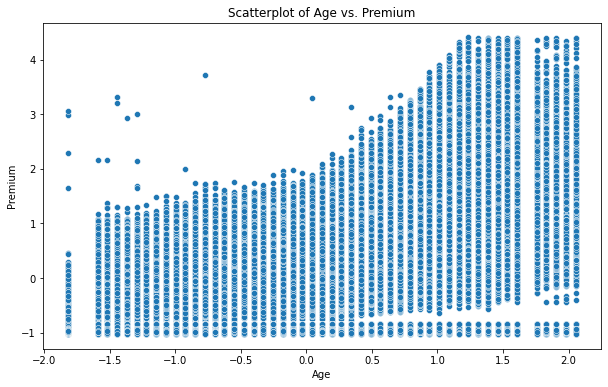

In [54]:
# 6. Scatterplot of Age vs. Premium
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Premium', data=rate_df)
plt.title('Scatterplot of Age vs. Premium')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

# Demo Model 

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

In [56]:
# Feature selection (dropping columns that won't be used in the model)
features = ['StateCode', 'SourceName', 'Age', 'Tobacco', 'RateDuration', 'Age_RateDuration_Interaction']
X = rate_df[features]
y = rate_df['Premium']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Initialize a dictionary to store model scores
model_scores = {}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

model_scores['Linear Regression'] = {
    'MSE': mse_lr,
    'RMSE': rmse_lr,
    'MAE': mae_lr,
    'R2 Score': r2_lr
}

In [58]:
# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

model_scores['Lasso Regression'] = {
    'MSE': mse_lasso,
    'RMSE': rmse_lasso,
    'MAE': mae_lasso,
    'R2 Score': r2_lasso
}

In [59]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

model_scores['Ridge Regression'] = {
    'MSE': mse_ridge,
    'RMSE': rmse_ridge,
    'MAE': mae_ridge,
    'R2 Score': r2_ridge
}

In [60]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

model_scores['Random Forest'] = {
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'MAE': mae_rf,
    'R2 Score': r2_rf
}

In [61]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

model_scores['Gradient Boosting'] = {
    'MSE': mse_gb,
    'RMSE': rmse_gb,
    'MAE': mae_gb,
    'R2 Score': r2_gb
}

In [62]:
# KNN Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

model_scores['KNN Regression'] = {
    'MSE': mse_knn,
    'RMSE': rmse_knn,
    'MAE': mae_knn,
    'R2 Score': r2_knn
}

In [63]:
# Display the results
for model_name, scores in model_scores.items():
    print(f"{model_name}: {scores}")

Linear Regression: {'MSE': 0.39180623183556457, 'RMSE': 0.6259442721485392, 'MAE': 0.486361919821059, 'R2 Score': 0.6159361589160548}
Lasso Regression: {'MSE': 1.0202796515117738, 'RMSE': 1.010088932476628, 'MAE': 0.8032966255494287, 'R2 Score': -0.00011814539962640147}
Ridge Regression: {'MSE': 0.391806444113209, 'RMSE': 0.6259444417144456, 'MAE': 0.4863599258812031, 'R2 Score': 0.615935950833179}
Random Forest: {'MSE': 0.16429696779496128, 'RMSE': 0.4053356236441121, 'MAE': 0.26564753923510176, 'R2 Score': 0.8389496659250166}
Gradient Boosting: {'MSE': 0.18146098237797822, 'RMSE': 0.4259823733184018, 'MAE': 0.2933579799844333, 'R2 Score': 0.822124825395321}
KNN Regression: {'MSE': 0.18412055248671713, 'RMSE': 0.4290927084986613, 'MAE': 0.28027186153831984, 'R2 Score': 0.8195178104256791}


In [64]:
models = {'Linear Regression': linear_model, 'Random Forest': rf_model, 'Gradient Boosting': gb_model}
cv_scores = {name: cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean() for name, model in models.items()}
print("\nCross-Validation Scores (R²):")
print(cv_scores)


Cross-Validation Scores (R²):
{'Linear Regression': 0.6118264465617356, 'Random Forest': 0.8354595636082986, 'Gradient Boosting': 0.817630606156466}


In [65]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='r2')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_


In [ ]:
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5, scoring='r2')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_


In [ ]:
final_model = best_gb_model
final_model.fit(X_train, y_train)
y_final_pred = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_final_pred))
final_r2 = r2_score(y_test, y_final_pred)

print("\nFinal Model Performance:")
print(f"RMSE: {final_rmse:.2f}")
print(f"R²: {final_r2:.2f}")


In [ ]:
# Plot model performance
results_df = pd.DataFrame(model_scores).T
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Feature Importance using Random Forest
importances = rf_model.feature_importances_
feature_names = features
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
# Residual Plot for Random Forest
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_rf
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Save the model and label encoders
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('label_encoder_state.pkl', 'wb') as file:
    pickle.dump(label_encoder_state, file)

with open('label_encoder_source.pkl', 'wb') as file:
    pickle.dump(label_encoder_source, file)

with open('label_encoder_tobacco.pkl', 'wb') as file:
    pickle.dump(label_encoder_tobacco, file)

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = rate_df.drop('Premium', axis=1)  # Assuming 'Premium' is the target variable
y = rate_df['Premium']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr}, MAE: {mae_lr}, R2: {r2_lr}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - RMSE: {rmse_rf}, MAE: {mae_rf}, R2: {r2_rf}")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression - RMSE: {rmse_gb}, MAE: {mae_gb}, R2: {r2_gb}")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Regression - RMSE: {rmse_knn}, MAE: {mae_knn}, R2: {r2_knn}")